<a href="https://colab.research.google.com/github/diro5t/deep_quadric_learning/blob/main/DQL_Episode3_Quadric_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Quadric Learning - A tale in 3 episodes
## Episode 3: Quadric Layers
### (C) Dirk Roeckmann 2023

https://scholar.google.com/citations?hl=en&user=hamuGh4AAAAJ

# Introduction
In the last episode I established that classification problems where layers of linear units are necessary can be solved with a single quadric neuron which is proof of a significant reduction of model size and parameters. In this episode I will introduce quadric layers in PyTorch exemplified in a custom layer class and apply it to the IRIS dataset for a little demonstration in multi-class classification.



In [7]:
# get stuff needed for this episode
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import math
from typing import Any
from torch import Tensor
from torch.nn.parameter import Parameter, UninitializedParameter

# Custom Quadric Layer

The quadric layer can be modeled straight-forward as a custom layer in PyTorch:

In [8]:
class Quadric(nn.Module):
    __constants__ = ['in_features', 'out_features']
    in_features: int
    out_features: int
    qweight: Tensor
    lweight: Tensor

    def __init__(self, in_features: int, out_features: int, bias: bool = True,
                 device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        # quadratic weights
        self.qweight = Parameter(torch.empty((out_features, in_features), **factory_kwargs))
        # linear weights
        self.lweight = Parameter(torch.empty((out_features, in_features), **factory_kwargs))
        # bias
        if bias:
            self.bias = Parameter(torch.empty(out_features, **factory_kwargs))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self) -> None:
        nn.init.kaiming_uniform_(self.qweight, a=math.sqrt(5))
        nn.init.kaiming_uniform_(self.lweight, a=math.sqrt(5))
        if self.bias is not None:
            fan_in_q, _ = nn.init._calculate_fan_in_and_fan_out(self.qweight)
            fan_in_l, _ = nn.init._calculate_fan_in_and_fan_out(self.lweight)
            bound = 1 / math.sqrt(fan_in_l) if fan_in_l > 0 else 0
            nn.init.uniform_(self.bias, -bound, bound)

    def forward(self, input: Tensor) -> Tensor:
        input_sqr = torch.mul(input, input)
        qi = nn.functional.linear(input_sqr, self.qweight, None)
        wib = nn.functional.linear(input, self.lweight, self.bias)
        return torch.add(qi, wib)

    def extra_repr(self) -> str:
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )

# IRIS Multi-Class Classification

## Linear Layers

First let's classify the IRIS dataset with linear units:
4 inputs, a 8-unit hidden layer and a 3-unit output layer

This example code has been taken verbatim from:

https://machinelearningmastery.com/building-a-multiclass-classification-model-in-pytorch/

Training will be 200 epochs with a batch size of 5.

Epoch 0: 100%|██████████| 21/21 [00:00<00:00, 186.00batch/s, acc=0.2, loss=1.74]


Epoch 0 validation: Cross-entropy=1.53, Accuracy=31.1%


Epoch 1: 100%|██████████| 21/21 [00:00<00:00, 244.51batch/s, acc=0.2, loss=1.56]


Epoch 1 validation: Cross-entropy=1.38, Accuracy=31.1%


Epoch 2: 100%|██████████| 21/21 [00:00<00:00, 200.31batch/s, acc=0.2, loss=1.43]


Epoch 2 validation: Cross-entropy=1.28, Accuracy=31.1%


Epoch 3: 100%|██████████| 21/21 [00:00<00:00, 204.29batch/s, acc=0.2, loss=1.33]


Epoch 3 validation: Cross-entropy=1.22, Accuracy=31.1%


Epoch 4: 100%|██████████| 21/21 [00:00<00:00, 184.25batch/s, acc=0.2, loss=1.26]


Epoch 4 validation: Cross-entropy=1.17, Accuracy=31.1%


Epoch 5: 100%|██████████| 21/21 [00:00<00:00, 200.57batch/s, acc=0.2, loss=1.21]


Epoch 5 validation: Cross-entropy=1.14, Accuracy=31.1%


Epoch 6: 100%|██████████| 21/21 [00:00<00:00, 197.12batch/s, acc=0.2, loss=1.17]


Epoch 6 validation: Cross-entropy=1.11, Accuracy=31.1%


Epoch 7: 100%|██████████| 21/21 [00:00<00:00, 152.38batch/s, acc=0.2, loss=1.14]


Epoch 7 validation: Cross-entropy=1.09, Accuracy=31.1%


Epoch 8: 100%|██████████| 21/21 [00:00<00:00, 43.53batch/s, acc=0.2, loss=1.12]


Epoch 8 validation: Cross-entropy=1.07, Accuracy=31.1%


Epoch 9: 100%|██████████| 21/21 [00:00<00:00, 135.35batch/s, acc=0.2, loss=1.1]


Epoch 9 validation: Cross-entropy=1.06, Accuracy=31.1%


Epoch 10: 100%|██████████| 21/21 [00:00<00:00, 124.74batch/s, acc=0.2, loss=1.08]


Epoch 10 validation: Cross-entropy=1.05, Accuracy=31.1%


Epoch 11: 100%|██████████| 21/21 [00:00<00:00, 147.23batch/s, acc=0.4, loss=1.06]


Epoch 11 validation: Cross-entropy=1.04, Accuracy=28.9%


Epoch 12: 100%|██████████| 21/21 [00:00<00:00, 139.12batch/s, acc=0.2, loss=1.05]


Epoch 12 validation: Cross-entropy=1.03, Accuracy=28.9%


Epoch 13: 100%|██████████| 21/21 [00:00<00:00, 156.49batch/s, acc=0.2, loss=1.04]


Epoch 13 validation: Cross-entropy=1.02, Accuracy=37.8%


Epoch 14: 100%|██████████| 21/21 [00:00<00:00, 143.96batch/s, acc=0.2, loss=1.03]


Epoch 14 validation: Cross-entropy=1.01, Accuracy=35.6%


Epoch 15: 100%|██████████| 21/21 [00:00<00:00, 146.40batch/s, acc=0.4, loss=1.02]


Epoch 15 validation: Cross-entropy=1.00, Accuracy=33.3%


Epoch 16: 100%|██████████| 21/21 [00:00<00:00, 143.41batch/s, acc=0.4, loss=1]


Epoch 16 validation: Cross-entropy=0.99, Accuracy=33.3%


Epoch 17: 100%|██████████| 21/21 [00:00<00:00, 148.73batch/s, acc=0.4, loss=0.993]


Epoch 17 validation: Cross-entropy=0.99, Accuracy=35.6%


Epoch 18: 100%|██████████| 21/21 [00:00<00:00, 116.00batch/s, acc=0.4, loss=0.982]


Epoch 18 validation: Cross-entropy=0.98, Accuracy=35.6%


Epoch 19: 100%|██████████| 21/21 [00:00<00:00, 198.23batch/s, acc=0.4, loss=0.971]


Epoch 19 validation: Cross-entropy=0.96, Accuracy=42.2%


Epoch 20: 100%|██████████| 21/21 [00:00<00:00, 192.44batch/s, acc=0.4, loss=0.959]


Epoch 20 validation: Cross-entropy=0.95, Accuracy=53.3%


Epoch 21: 100%|██████████| 21/21 [00:00<00:00, 204.32batch/s, acc=0.4, loss=0.947]


Epoch 21 validation: Cross-entropy=0.94, Accuracy=57.8%


Epoch 22: 100%|██████████| 21/21 [00:00<00:00, 214.14batch/s, acc=0.8, loss=0.934]


Epoch 22 validation: Cross-entropy=0.93, Accuracy=64.4%


Epoch 23: 100%|██████████| 21/21 [00:00<00:00, 205.03batch/s, acc=0.8, loss=0.921]


Epoch 23 validation: Cross-entropy=0.92, Accuracy=68.9%


Epoch 24: 100%|██████████| 21/21 [00:00<00:00, 202.74batch/s, acc=0.8, loss=0.907]


Epoch 24 validation: Cross-entropy=0.91, Accuracy=68.9%


Epoch 25: 100%|██████████| 21/21 [00:00<00:00, 224.32batch/s, acc=0.8, loss=0.893]


Epoch 25 validation: Cross-entropy=0.89, Accuracy=68.9%


Epoch 26: 100%|██████████| 21/21 [00:00<00:00, 218.68batch/s, acc=0.8, loss=0.879]


Epoch 26 validation: Cross-entropy=0.88, Accuracy=68.9%


Epoch 27: 100%|██████████| 21/21 [00:00<00:00, 226.08batch/s, acc=0.8, loss=0.864]


Epoch 27 validation: Cross-entropy=0.86, Accuracy=68.9%


Epoch 28: 100%|██████████| 21/21 [00:00<00:00, 215.17batch/s, acc=0.8, loss=0.848]


Epoch 28 validation: Cross-entropy=0.85, Accuracy=68.9%


Epoch 29: 100%|██████████| 21/21 [00:00<00:00, 80.61batch/s, acc=0.8, loss=0.833] 


Epoch 29 validation: Cross-entropy=0.84, Accuracy=68.9%


Epoch 30: 100%|██████████| 21/21 [00:00<00:00, 155.74batch/s, acc=0.8, loss=0.817]


Epoch 30 validation: Cross-entropy=0.82, Accuracy=71.1%


Epoch 31: 100%|██████████| 21/21 [00:00<00:00, 229.56batch/s, acc=0.8, loss=0.801]


Epoch 31 validation: Cross-entropy=0.81, Accuracy=71.1%


Epoch 32: 100%|██████████| 21/21 [00:00<00:00, 228.19batch/s, acc=0.8, loss=0.786]


Epoch 32 validation: Cross-entropy=0.79, Accuracy=71.1%


Epoch 33: 100%|██████████| 21/21 [00:00<00:00, 218.63batch/s, acc=0.8, loss=0.771]


Epoch 33 validation: Cross-entropy=0.78, Accuracy=71.1%


Epoch 34: 100%|██████████| 21/21 [00:00<00:00, 80.79batch/s, acc=0.8, loss=0.756]


Epoch 34 validation: Cross-entropy=0.77, Accuracy=71.1%


Epoch 35: 100%|██████████| 21/21 [00:00<00:00, 197.03batch/s, acc=0.8, loss=0.741]


Epoch 35 validation: Cross-entropy=0.75, Accuracy=71.1%


Epoch 36: 100%|██████████| 21/21 [00:00<00:00, 201.40batch/s, acc=0.8, loss=0.728]


Epoch 36 validation: Cross-entropy=0.74, Accuracy=71.1%


Epoch 37: 100%|██████████| 21/21 [00:00<00:00, 213.52batch/s, acc=0.8, loss=0.715]


Epoch 37 validation: Cross-entropy=0.73, Accuracy=71.1%


Epoch 38: 100%|██████████| 21/21 [00:00<00:00, 201.40batch/s, acc=0.8, loss=0.702]


Epoch 38 validation: Cross-entropy=0.72, Accuracy=71.1%


Epoch 39: 100%|██████████| 21/21 [00:00<00:00, 190.74batch/s, acc=0.8, loss=0.69]


Epoch 39 validation: Cross-entropy=0.71, Accuracy=73.3%


Epoch 40: 100%|██████████| 21/21 [00:00<00:00, 65.91batch/s, acc=0.8, loss=0.678] 


Epoch 40 validation: Cross-entropy=0.69, Accuracy=73.3%


Epoch 41: 100%|██████████| 21/21 [00:00<00:00, 224.36batch/s, acc=0.8, loss=0.666]


Epoch 41 validation: Cross-entropy=0.68, Accuracy=73.3%


Epoch 42: 100%|██████████| 21/21 [00:00<00:00, 217.58batch/s, acc=0.8, loss=0.654]


Epoch 42 validation: Cross-entropy=0.67, Accuracy=73.3%


Epoch 43: 100%|██████████| 21/21 [00:00<00:00, 213.39batch/s, acc=0.8, loss=0.643]


Epoch 43 validation: Cross-entropy=0.66, Accuracy=73.3%


Epoch 44: 100%|██████████| 21/21 [00:00<00:00, 199.38batch/s, acc=0.8, loss=0.632]


Epoch 44 validation: Cross-entropy=0.65, Accuracy=73.3%


Epoch 45: 100%|██████████| 21/21 [00:00<00:00, 78.11batch/s, acc=0.8, loss=0.621] 


Epoch 45 validation: Cross-entropy=0.64, Accuracy=73.3%


Epoch 46: 100%|██████████| 21/21 [00:00<00:00, 238.98batch/s, acc=0.8, loss=0.61]


Epoch 46 validation: Cross-entropy=0.63, Accuracy=73.3%


Epoch 47: 100%|██████████| 21/21 [00:00<00:00, 244.04batch/s, acc=0.8, loss=0.6]


Epoch 47 validation: Cross-entropy=0.62, Accuracy=73.3%


Epoch 48: 100%|██████████| 21/21 [00:00<00:00, 237.48batch/s, acc=0.8, loss=0.59]


Epoch 48 validation: Cross-entropy=0.61, Accuracy=73.3%


Epoch 49: 100%|██████████| 21/21 [00:00<00:00, 230.04batch/s, acc=0.8, loss=0.58]


Epoch 49 validation: Cross-entropy=0.60, Accuracy=75.6%


Epoch 50: 100%|██████████| 21/21 [00:00<00:00, 80.11batch/s, acc=0.8, loss=0.571] 


Epoch 50 validation: Cross-entropy=0.59, Accuracy=75.6%


Epoch 51: 100%|██████████| 21/21 [00:00<00:00, 215.92batch/s, acc=0.8, loss=0.562]


Epoch 51 validation: Cross-entropy=0.59, Accuracy=75.6%


Epoch 52: 100%|██████████| 21/21 [00:00<00:00, 228.28batch/s, acc=0.8, loss=0.554]


Epoch 52 validation: Cross-entropy=0.58, Accuracy=75.6%


Epoch 53: 100%|██████████| 21/21 [00:00<00:00, 223.32batch/s, acc=0.8, loss=0.546]


Epoch 53 validation: Cross-entropy=0.57, Accuracy=75.6%


Epoch 54: 100%|██████████| 21/21 [00:00<00:00, 230.95batch/s, acc=0.8, loss=0.538]


Epoch 54 validation: Cross-entropy=0.56, Accuracy=77.8%


Epoch 55: 100%|██████████| 21/21 [00:00<00:00, 82.80batch/s, acc=0.8, loss=0.53]


Epoch 55 validation: Cross-entropy=0.55, Accuracy=82.2%


Epoch 56: 100%|██████████| 21/21 [00:00<00:00, 237.84batch/s, acc=0.8, loss=0.523]


Epoch 56 validation: Cross-entropy=0.55, Accuracy=82.2%


Epoch 57: 100%|██████████| 21/21 [00:00<00:00, 260.34batch/s, acc=0.8, loss=0.515]


Epoch 57 validation: Cross-entropy=0.54, Accuracy=82.2%


Epoch 58: 100%|██████████| 21/21 [00:00<00:00, 214.83batch/s, acc=0.8, loss=0.509]


Epoch 58 validation: Cross-entropy=0.53, Accuracy=84.4%


Epoch 59: 100%|██████████| 21/21 [00:00<00:00, 186.19batch/s, acc=0.8, loss=0.502]


Epoch 59 validation: Cross-entropy=0.53, Accuracy=84.4%


Epoch 60: 100%|██████████| 21/21 [00:00<00:00, 230.27batch/s, acc=0.8, loss=0.496]


Epoch 60 validation: Cross-entropy=0.52, Accuracy=86.7%


Epoch 61: 100%|██████████| 21/21 [00:00<00:00, 83.50batch/s, acc=0.8, loss=0.49] 


Epoch 61 validation: Cross-entropy=0.52, Accuracy=86.7%


Epoch 62: 100%|██████████| 21/21 [00:00<00:00, 252.93batch/s, acc=0.8, loss=0.484]


Epoch 62 validation: Cross-entropy=0.51, Accuracy=86.7%


Epoch 63: 100%|██████████| 21/21 [00:00<00:00, 225.16batch/s, acc=0.8, loss=0.478]


Epoch 63 validation: Cross-entropy=0.50, Accuracy=86.7%


Epoch 64: 100%|██████████| 21/21 [00:00<00:00, 235.22batch/s, acc=0.8, loss=0.473]


Epoch 64 validation: Cross-entropy=0.50, Accuracy=86.7%


Epoch 65: 100%|██████████| 21/21 [00:00<00:00, 240.81batch/s, acc=0.8, loss=0.468]


Epoch 65 validation: Cross-entropy=0.49, Accuracy=86.7%


Epoch 66: 100%|██████████| 21/21 [00:00<00:00, 80.65batch/s, acc=0.8, loss=0.463] 


Epoch 66 validation: Cross-entropy=0.49, Accuracy=86.7%


Epoch 67: 100%|██████████| 21/21 [00:00<00:00, 215.73batch/s, acc=0.8, loss=0.458]


Epoch 67 validation: Cross-entropy=0.48, Accuracy=88.9%


Epoch 68: 100%|██████████| 21/21 [00:00<00:00, 187.14batch/s, acc=0.8, loss=0.453]


Epoch 68 validation: Cross-entropy=0.48, Accuracy=88.9%


Epoch 69: 100%|██████████| 21/21 [00:00<00:00, 217.18batch/s, acc=0.8, loss=0.449]


Epoch 69 validation: Cross-entropy=0.48, Accuracy=91.1%


Epoch 70: 100%|██████████| 21/21 [00:00<00:00, 232.54batch/s, acc=0.8, loss=0.444]


Epoch 70 validation: Cross-entropy=0.47, Accuracy=91.1%


Epoch 71: 100%|██████████| 21/21 [00:00<00:00, 82.07batch/s, acc=0.8, loss=0.44]


Epoch 71 validation: Cross-entropy=0.47, Accuracy=91.1%


Epoch 72: 100%|██████████| 21/21 [00:00<00:00, 210.27batch/s, acc=0.8, loss=0.436]


Epoch 72 validation: Cross-entropy=0.46, Accuracy=91.1%


Epoch 73:  38%|███▊      | 8/21 [00:00<00:00, 193.12batch/s, acc=0.8, loss=0.566]

Epoch 80 validation: Cross-entropy=0.43, Accuracy=93.3%


Epoch 81: 100%|██████████| 21/21 [00:00<00:00, 203.56batch/s, acc=1, loss=0.406]


Epoch 81 validation: Cross-entropy=0.43, Accuracy=93.3%


Epoch 82: 100%|██████████| 21/21 [00:00<00:00, 106.73batch/s, acc=1, loss=0.403]


Epoch 82 validation: Cross-entropy=0.43, Accuracy=93.3%


Epoch 83: 100%|██████████| 21/21 [00:00<00:00, 144.06batch/s, acc=1, loss=0.4]


Epoch 83 validation: Cross-entropy=0.43, Accuracy=93.3%


Epoch 84: 100%|██████████| 21/21 [00:00<00:00, 206.00batch/s, acc=1, loss=0.397]


Epoch 84 validation: Cross-entropy=0.42, Accuracy=93.3%


Epoch 85: 100%|██████████| 21/21 [00:00<00:00, 181.40batch/s, acc=1, loss=0.394]


Epoch 85 validation: Cross-entropy=0.42, Accuracy=93.3%


Epoch 86: 100%|██████████| 21/21 [00:00<00:00, 147.82batch/s, acc=1, loss=0.392]


Epoch 86 validation: Cross-entropy=0.42, Accuracy=93.3%


Epoch 87: 100%|██████████| 21/21 [00:00<00:00, 145.87batch/s, acc=1, loss=0.389]


Epoch 87 validation: Cross-entropy=0.41, Accuracy=93.3%


Epoch 88: 100%|██████████| 21/21 [00:00<00:00, 177.65batch/s, acc=1, loss=0.386]


Epoch 88 validation: Cross-entropy=0.41, Accuracy=93.3%


Epoch 89: 100%|██████████| 21/21 [00:00<00:00, 200.00batch/s, acc=1, loss=0.384]


Epoch 89 validation: Cross-entropy=0.41, Accuracy=95.6%


Epoch 90: 100%|██████████| 21/21 [00:00<00:00, 157.85batch/s, acc=1, loss=0.381]


Epoch 90 validation: Cross-entropy=0.41, Accuracy=95.6%


Epoch 99: 100%|██████████| 21/21 [00:00<00:00, 164.24batch/s, acc=1, loss=0.36]


Epoch 99 validation: Cross-entropy=0.38, Accuracy=95.6%


Epoch 100: 100%|██████████| 21/21 [00:00<00:00, 207.97batch/s, acc=1, loss=0.358]


Epoch 100 validation: Cross-entropy=0.38, Accuracy=95.6%


Epoch 101: 100%|██████████| 21/21 [00:00<00:00, 203.79batch/s, acc=1, loss=0.356]


Epoch 101 validation: Cross-entropy=0.38, Accuracy=95.6%


Epoch 102: 100%|██████████| 21/21 [00:00<00:00, 195.95batch/s, acc=1, loss=0.354]


Epoch 102 validation: Cross-entropy=0.38, Accuracy=95.6%


Epoch 103: 100%|██████████| 21/21 [00:00<00:00, 210.40batch/s, acc=1, loss=0.352]


Epoch 103 validation: Cross-entropy=0.37, Accuracy=95.6%


Epoch 104: 100%|██████████| 21/21 [00:00<00:00, 183.99batch/s, acc=1, loss=0.35]


Epoch 104 validation: Cross-entropy=0.37, Accuracy=95.6%


Epoch 105: 100%|██████████| 21/21 [00:00<00:00, 195.99batch/s, acc=1, loss=0.348]


Epoch 105 validation: Cross-entropy=0.37, Accuracy=95.6%


Epoch 106: 100%|██████████| 21/21 [00:00<00:00, 170.12batch/s, acc=1, loss=0.346]


Epoch 106 validation: Cross-entropy=0.37, Accuracy=95.6%


Epoch 107: 100%|██████████| 21/21 [00:00<00:00, 203.14batch/s, acc=1, loss=0.344]


Epoch 107 validation: Cross-entropy=0.37, Accuracy=95.6%


Epoch 108: 100%|██████████| 21/21 [00:00<00:00, 82.50batch/s, acc=1, loss=0.342] 


Epoch 108 validation: Cross-entropy=0.36, Accuracy=95.6%


Epoch 125: 100%|██████████| 21/21 [00:00<00:00, 135.92batch/s, acc=1, loss=0.312]


Epoch 125 validation: Cross-entropy=0.33, Accuracy=95.6%


Epoch 126: 100%|██████████| 21/21 [00:00<00:00, 176.26batch/s, acc=1, loss=0.31]


Epoch 126 validation: Cross-entropy=0.33, Accuracy=95.6%


Epoch 127: 100%|██████████| 21/21 [00:00<00:00, 164.93batch/s, acc=1, loss=0.308]


Epoch 127 validation: Cross-entropy=0.33, Accuracy=95.6%


Epoch 128: 100%|██████████| 21/21 [00:00<00:00, 216.49batch/s, acc=1, loss=0.307]


Epoch 128 validation: Cross-entropy=0.32, Accuracy=95.6%


Epoch 129: 100%|██████████| 21/21 [00:00<00:00, 150.61batch/s, acc=1, loss=0.305]


Epoch 129 validation: Cross-entropy=0.32, Accuracy=95.6%


Epoch 130: 100%|██████████| 21/21 [00:00<00:00, 74.81batch/s, acc=1, loss=0.303] 


Epoch 130 validation: Cross-entropy=0.32, Accuracy=95.6%


Epoch 131: 100%|██████████| 21/21 [00:00<00:00, 189.72batch/s, acc=1, loss=0.301]


Epoch 131 validation: Cross-entropy=0.32, Accuracy=95.6%


Epoch 132: 100%|██████████| 21/21 [00:00<00:00, 186.42batch/s, acc=1, loss=0.3]


Epoch 132 validation: Cross-entropy=0.32, Accuracy=95.6%


Epoch 133: 100%|██████████| 21/21 [00:00<00:00, 138.09batch/s, acc=1, loss=0.298]


Epoch 133 validation: Cross-entropy=0.32, Accuracy=95.6%


Epoch 134: 100%|██████████| 21/21 [00:00<00:00, 168.72batch/s, acc=1, loss=0.296]


Epoch 134 validation: Cross-entropy=0.31, Accuracy=95.6%


Epoch 135: 100%|██████████| 21/21 [00:00<00:00, 178.35batch/s, acc=1, loss=0.295]


Epoch 135 validation: Cross-entropy=0.31, Accuracy=95.6%


Epoch 142: 100%|██████████| 21/21 [00:00<00:00, 169.87batch/s, acc=1, loss=0.283]


Epoch 142 validation: Cross-entropy=0.30, Accuracy=95.6%


Epoch 143: 100%|██████████| 21/21 [00:00<00:00, 176.36batch/s, acc=1, loss=0.282]


Epoch 143 validation: Cross-entropy=0.30, Accuracy=95.6%


Epoch 144: 100%|██████████| 21/21 [00:00<00:00, 230.46batch/s, acc=1, loss=0.28]


Epoch 144 validation: Cross-entropy=0.30, Accuracy=95.6%


Epoch 145: 100%|██████████| 21/21 [00:00<00:00, 207.96batch/s, acc=1, loss=0.278]


Epoch 145 validation: Cross-entropy=0.30, Accuracy=95.6%


Epoch 146: 100%|██████████| 21/21 [00:00<00:00, 206.47batch/s, acc=1, loss=0.277]


Epoch 146 validation: Cross-entropy=0.29, Accuracy=95.6%


Epoch 147: 100%|██████████| 21/21 [00:00<00:00, 188.94batch/s, acc=1, loss=0.275]


Epoch 147 validation: Cross-entropy=0.29, Accuracy=95.6%


Epoch 148: 100%|██████████| 21/21 [00:00<00:00, 193.82batch/s, acc=1, loss=0.274]


Epoch 148 validation: Cross-entropy=0.29, Accuracy=95.6%


Epoch 149: 100%|██████████| 21/21 [00:00<00:00, 184.33batch/s, acc=1, loss=0.272]


Epoch 149 validation: Cross-entropy=0.29, Accuracy=95.6%


Epoch 150: 100%|██████████| 21/21 [00:00<00:00, 117.09batch/s, acc=1, loss=0.27]


Epoch 150 validation: Cross-entropy=0.29, Accuracy=95.6%


Epoch 151: 100%|██████████| 21/21 [00:00<00:00, 198.34batch/s, acc=1, loss=0.269]


Epoch 151 validation: Cross-entropy=0.29, Accuracy=95.6%


Epoch 166: 100%|██████████| 21/21 [00:00<00:00, 59.22batch/s, acc=1, loss=0.246] 


Epoch 166 validation: Cross-entropy=0.26, Accuracy=95.6%


Epoch 167: 100%|██████████| 21/21 [00:00<00:00, 68.51batch/s, acc=1, loss=0.244]


Epoch 167 validation: Cross-entropy=0.26, Accuracy=95.6%


Epoch 168: 100%|██████████| 21/21 [00:00<00:00, 137.07batch/s, acc=1, loss=0.243]


Epoch 168 validation: Cross-entropy=0.26, Accuracy=95.6%


Epoch 169: 100%|██████████| 21/21 [00:00<00:00, 141.41batch/s, acc=1, loss=0.242]


Epoch 169 validation: Cross-entropy=0.26, Accuracy=95.6%


Epoch 170: 100%|██████████| 21/21 [00:00<00:00, 119.20batch/s, acc=1, loss=0.24]


Epoch 170 validation: Cross-entropy=0.26, Accuracy=95.6%


Epoch 171: 100%|██████████| 21/21 [00:00<00:00, 143.52batch/s, acc=1, loss=0.239]


Epoch 171 validation: Cross-entropy=0.26, Accuracy=95.6%


Epoch 172: 100%|██████████| 21/21 [00:00<00:00, 125.52batch/s, acc=1, loss=0.237]


Epoch 172 validation: Cross-entropy=0.26, Accuracy=95.6%


Epoch 173: 100%|██████████| 21/21 [00:00<00:00, 140.64batch/s, acc=1, loss=0.236]


Epoch 173 validation: Cross-entropy=0.25, Accuracy=95.6%


Epoch 174: 100%|██████████| 21/21 [00:00<00:00, 159.21batch/s, acc=1, loss=0.234]


Epoch 174 validation: Cross-entropy=0.25, Accuracy=95.6%


Epoch 175: 100%|██████████| 21/21 [00:00<00:00, 177.68batch/s, acc=1, loss=0.233]


Epoch 175 validation: Cross-entropy=0.25, Accuracy=95.6%


Epoch 176: 100%|██████████| 21/21 [00:00<00:00, 127.75batch/s, acc=1, loss=0.231]


Epoch 176 validation: Cross-entropy=0.25, Accuracy=95.6%


Epoch 182: 100%|██████████| 21/21 [00:00<00:00, 66.44batch/s, acc=1, loss=0.223]


Epoch 182 validation: Cross-entropy=0.24, Accuracy=95.6%


Epoch 183: 100%|██████████| 21/21 [00:00<00:00, 194.79batch/s, acc=1, loss=0.221]


Epoch 183 validation: Cross-entropy=0.24, Accuracy=95.6%


Epoch 184: 100%|██████████| 21/21 [00:00<00:00, 73.62batch/s, acc=1, loss=0.22] 


Epoch 184 validation: Cross-entropy=0.24, Accuracy=95.6%


Epoch 185: 100%|██████████| 21/21 [00:00<00:00, 158.81batch/s, acc=1, loss=0.219]


Epoch 185 validation: Cross-entropy=0.24, Accuracy=95.6%


Epoch 186: 100%|██████████| 21/21 [00:00<00:00, 200.16batch/s, acc=1, loss=0.217]


Epoch 186 validation: Cross-entropy=0.24, Accuracy=95.6%


Epoch 187: 100%|██████████| 21/21 [00:00<00:00, 89.83batch/s, acc=1, loss=0.216]


Epoch 187 validation: Cross-entropy=0.24, Accuracy=95.6%


Epoch 188: 100%|██████████| 21/21 [00:00<00:00, 147.96batch/s, acc=1, loss=0.215]


Epoch 188 validation: Cross-entropy=0.24, Accuracy=95.6%


Epoch 189: 100%|██████████| 21/21 [00:00<00:00, 146.35batch/s, acc=1, loss=0.213]


Epoch 189 validation: Cross-entropy=0.23, Accuracy=95.6%


Epoch 190: 100%|██████████| 21/21 [00:00<00:00, 143.02batch/s, acc=1, loss=0.212]


Epoch 190 validation: Cross-entropy=0.23, Accuracy=95.6%


Epoch 191: 100%|██████████| 21/21 [00:00<00:00, 176.85batch/s, acc=1, loss=0.211]


Epoch 191 validation: Cross-entropy=0.23, Accuracy=95.6%


Epoch 192: 100%|██████████| 21/21 [00:00<00:00, 201.58batch/s, acc=1, loss=0.209]


Epoch 192 validation: Cross-entropy=0.23, Accuracy=95.6%


Epoch 193:  29%|██▊       | 6/21 [00:00<00:00, 199.94batch/s, acc=1, loss=0.287]

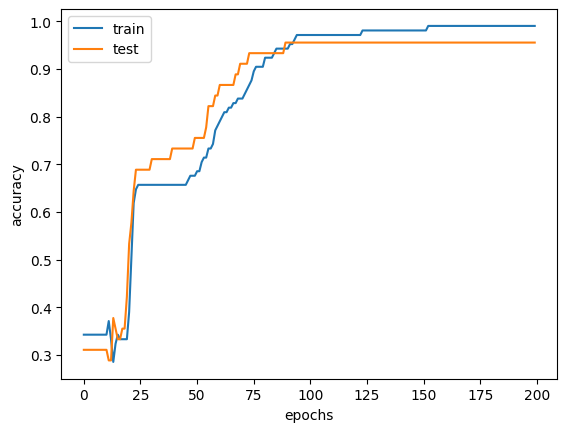

In [9]:
# read data and apply one-hot encoding
data = pd.read_csv("sample_data/iris.csv", header=None)
X = data.iloc[:, 0:4]
y = data.iloc[:, 4:]
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
y = ohe.transform(y)

# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(4, 8)
        self.act = nn.ReLU()
        self.output = nn.Linear(8, 3)

    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.output(x)
        return x

# loss metric and optimizer
model = Multiclass()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# prepare model and training parameters
n_epochs = 200
batch_size = 5
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# Restore best model
model.load_state_dict(best_weights)

# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

## Quadric Layers
We classify the IRIS dataset now with a hybrid model consisting of 4 inputs, a 4-unit quadric hidden layer and a 3-unit linear hiddeb layer and achieve similar accuracy.

Epoch 0: 100%|██████████| 21/21 [00:00<00:00, 124.40batch/s, acc=0.4, loss=7.99]


Epoch 0 validation: Cross-entropy=7.88, Accuracy=35.6%


Epoch 1: 100%|██████████| 21/21 [00:00<00:00, 147.90batch/s, acc=0.4, loss=6.13]


Epoch 1 validation: Cross-entropy=5.92, Accuracy=35.6%


Epoch 2: 100%|██████████| 21/21 [00:00<00:00, 159.03batch/s, acc=0.4, loss=4.48]


Epoch 2 validation: Cross-entropy=4.19, Accuracy=35.6%


Epoch 3: 100%|██████████| 21/21 [00:00<00:00, 160.79batch/s, acc=0, loss=3.24]


Epoch 3 validation: Cross-entropy=2.94, Accuracy=0.0%


Epoch 4: 100%|██████████| 21/21 [00:00<00:00, 208.06batch/s, acc=0, loss=2.34]


Epoch 4 validation: Cross-entropy=2.10, Accuracy=24.4%


Epoch 5: 100%|██████████| 21/21 [00:00<00:00, 197.49batch/s, acc=0.2, loss=1.65]


Epoch 5 validation: Cross-entropy=1.52, Accuracy=28.9%


Epoch 6: 100%|██████████| 21/21 [00:00<00:00, 188.33batch/s, acc=0.4, loss=1.37]


Epoch 6 validation: Cross-entropy=1.31, Accuracy=40.0%


Epoch 7: 100%|██████████| 21/21 [00:00<00:00, 197.25batch/s, acc=0.2, loss=1.28]


Epoch 7 validation: Cross-entropy=1.24, Accuracy=40.0%


Epoch 8: 100%|██████████| 21/21 [00:00<00:00, 206.20batch/s, acc=0.2, loss=1.22]


Epoch 8 validation: Cross-entropy=1.18, Accuracy=44.4%


Epoch 9: 100%|██████████| 21/21 [00:00<00:00, 206.70batch/s, acc=0.2, loss=1.16]


Epoch 9 validation: Cross-entropy=1.12, Accuracy=48.9%


Epoch 10: 100%|██████████| 21/21 [00:00<00:00, 177.50batch/s, acc=0.4, loss=1.1]


Epoch 10 validation: Cross-entropy=1.07, Accuracy=51.1%


Epoch 11: 100%|██████████| 21/21 [00:00<00:00, 193.38batch/s, acc=0.4, loss=1.05]


Epoch 11 validation: Cross-entropy=1.02, Accuracy=51.1%


Epoch 12: 100%|██████████| 21/21 [00:00<00:00, 76.71batch/s, acc=0.4, loss=1]


Epoch 12 validation: Cross-entropy=0.98, Accuracy=51.1%


Epoch 13: 100%|██████████| 21/21 [00:00<00:00, 179.42batch/s, acc=0.4, loss=0.96]


Epoch 13 validation: Cross-entropy=0.94, Accuracy=53.3%


Epoch 14: 100%|██████████| 21/21 [00:00<00:00, 201.67batch/s, acc=0.4, loss=0.922]


Epoch 14 validation: Cross-entropy=0.90, Accuracy=60.0%


Epoch 15: 100%|██████████| 21/21 [00:00<00:00, 200.60batch/s, acc=0.4, loss=0.888]


Epoch 15 validation: Cross-entropy=0.87, Accuracy=64.4%


Epoch 16: 100%|██████████| 21/21 [00:00<00:00, 210.28batch/s, acc=0.4, loss=0.856]


Epoch 16 validation: Cross-entropy=0.84, Accuracy=68.9%


Epoch 17: 100%|██████████| 21/21 [00:00<00:00, 195.73batch/s, acc=0.4, loss=0.827]


Epoch 17 validation: Cross-entropy=0.82, Accuracy=75.6%


Epoch 18: 100%|██████████| 21/21 [00:00<00:00, 206.16batch/s, acc=0.6, loss=0.8]


Epoch 18 validation: Cross-entropy=0.79, Accuracy=82.2%


Epoch 19: 100%|██████████| 21/21 [00:00<00:00, 168.87batch/s, acc=0.8, loss=0.775]


Epoch 19 validation: Cross-entropy=0.77, Accuracy=86.7%


Epoch 20: 100%|██████████| 21/21 [00:00<00:00, 147.51batch/s, acc=0.8, loss=0.752]


Epoch 20 validation: Cross-entropy=0.75, Accuracy=86.7%


Epoch 21: 100%|██████████| 21/21 [00:00<00:00, 198.98batch/s, acc=0.8, loss=0.73]


Epoch 21 validation: Cross-entropy=0.73, Accuracy=88.9%


Epoch 22: 100%|██████████| 21/21 [00:00<00:00, 205.27batch/s, acc=0.8, loss=0.71]


Epoch 22 validation: Cross-entropy=0.71, Accuracy=93.3%


Epoch 23: 100%|██████████| 21/21 [00:00<00:00, 94.60batch/s, acc=0.8, loss=0.69] 


Epoch 23 validation: Cross-entropy=0.69, Accuracy=93.3%


Epoch 24: 100%|██████████| 21/21 [00:00<00:00, 195.42batch/s, acc=0.8, loss=0.672]


Epoch 24 validation: Cross-entropy=0.67, Accuracy=91.1%


Epoch 25: 100%|██████████| 21/21 [00:00<00:00, 211.69batch/s, acc=0.8, loss=0.655]


Epoch 25 validation: Cross-entropy=0.66, Accuracy=91.1%


Epoch 26: 100%|██████████| 21/21 [00:00<00:00, 189.89batch/s, acc=0.8, loss=0.638]


Epoch 26 validation: Cross-entropy=0.64, Accuracy=91.1%


Epoch 27: 100%|██████████| 21/21 [00:00<00:00, 208.99batch/s, acc=0.8, loss=0.622]


Epoch 27 validation: Cross-entropy=0.63, Accuracy=93.3%


Epoch 28: 100%|██████████| 21/21 [00:00<00:00, 81.01batch/s, acc=0.8, loss=0.607] 


Epoch 28 validation: Cross-entropy=0.61, Accuracy=93.3%


Epoch 29: 100%|██████████| 21/21 [00:00<00:00, 205.52batch/s, acc=0.8, loss=0.592]


Epoch 29 validation: Cross-entropy=0.60, Accuracy=93.3%


Epoch 30: 100%|██████████| 21/21 [00:00<00:00, 201.03batch/s, acc=0.8, loss=0.578]


Epoch 30 validation: Cross-entropy=0.58, Accuracy=93.3%


Epoch 31: 100%|██████████| 21/21 [00:00<00:00, 191.51batch/s, acc=0.8, loss=0.564]


Epoch 31 validation: Cross-entropy=0.57, Accuracy=93.3%


Epoch 32: 100%|██████████| 21/21 [00:00<00:00, 193.02batch/s, acc=1, loss=0.551]


Epoch 32 validation: Cross-entropy=0.56, Accuracy=93.3%


Epoch 33: 100%|██████████| 21/21 [00:00<00:00, 75.60batch/s, acc=1, loss=0.538]


Epoch 33 validation: Cross-entropy=0.55, Accuracy=93.3%


Epoch 34: 100%|██████████| 21/21 [00:00<00:00, 207.11batch/s, acc=1, loss=0.525]


Epoch 34 validation: Cross-entropy=0.53, Accuracy=93.3%


Epoch 35: 100%|██████████| 21/21 [00:00<00:00, 177.52batch/s, acc=1, loss=0.513]


Epoch 35 validation: Cross-entropy=0.52, Accuracy=93.3%


Epoch 36: 100%|██████████| 21/21 [00:00<00:00, 200.83batch/s, acc=1, loss=0.502]


Epoch 36 validation: Cross-entropy=0.51, Accuracy=93.3%


Epoch 37: 100%|██████████| 21/21 [00:00<00:00, 200.52batch/s, acc=1, loss=0.49]


Epoch 37 validation: Cross-entropy=0.50, Accuracy=93.3%


Epoch 38: 100%|██████████| 21/21 [00:00<00:00, 195.88batch/s, acc=1, loss=0.479]


Epoch 38 validation: Cross-entropy=0.49, Accuracy=93.3%


Epoch 39: 100%|██████████| 21/21 [00:00<00:00, 76.04batch/s, acc=1, loss=0.469] 


Epoch 39 validation: Cross-entropy=0.48, Accuracy=93.3%


Epoch 40: 100%|██████████| 21/21 [00:00<00:00, 210.62batch/s, acc=1, loss=0.458]


Epoch 40 validation: Cross-entropy=0.47, Accuracy=93.3%


Epoch 41: 100%|██████████| 21/21 [00:00<00:00, 188.05batch/s, acc=1, loss=0.448]


Epoch 41 validation: Cross-entropy=0.46, Accuracy=93.3%


Epoch 42: 100%|██████████| 21/21 [00:00<00:00, 186.46batch/s, acc=1, loss=0.439]


Epoch 42 validation: Cross-entropy=0.45, Accuracy=95.6%


Epoch 43: 100%|██████████| 21/21 [00:00<00:00, 171.36batch/s, acc=1, loss=0.429]


Epoch 43 validation: Cross-entropy=0.44, Accuracy=95.6%


Epoch 44: 100%|██████████| 21/21 [00:00<00:00, 78.12batch/s, acc=1, loss=0.42] 


Epoch 44 validation: Cross-entropy=0.43, Accuracy=95.6%


Epoch 45: 100%|██████████| 21/21 [00:00<00:00, 198.47batch/s, acc=1, loss=0.411]


Epoch 45 validation: Cross-entropy=0.42, Accuracy=95.6%


Epoch 46: 100%|██████████| 21/21 [00:00<00:00, 187.66batch/s, acc=1, loss=0.402]


Epoch 46 validation: Cross-entropy=0.41, Accuracy=95.6%


Epoch 47: 100%|██████████| 21/21 [00:00<00:00, 206.27batch/s, acc=1, loss=0.394]


Epoch 47 validation: Cross-entropy=0.41, Accuracy=95.6%


Epoch 48: 100%|██████████| 21/21 [00:00<00:00, 209.82batch/s, acc=1, loss=0.386]


Epoch 48 validation: Cross-entropy=0.40, Accuracy=95.6%


Epoch 49: 100%|██████████| 21/21 [00:00<00:00, 79.37batch/s, acc=1, loss=0.378] 


Epoch 49 validation: Cross-entropy=0.39, Accuracy=95.6%


Epoch 50: 100%|██████████| 21/21 [00:00<00:00, 205.07batch/s, acc=1, loss=0.37]


Epoch 50 validation: Cross-entropy=0.38, Accuracy=95.6%


Epoch 51: 100%|██████████| 21/21 [00:00<00:00, 212.38batch/s, acc=1, loss=0.363]


Epoch 51 validation: Cross-entropy=0.38, Accuracy=95.6%


Epoch 52: 100%|██████████| 21/21 [00:00<00:00, 204.28batch/s, acc=1, loss=0.356]


Epoch 52 validation: Cross-entropy=0.37, Accuracy=95.6%


Epoch 53: 100%|██████████| 21/21 [00:00<00:00, 200.48batch/s, acc=1, loss=0.349]


Epoch 53 validation: Cross-entropy=0.36, Accuracy=95.6%


Epoch 54: 100%|██████████| 21/21 [00:00<00:00, 77.36batch/s, acc=1, loss=0.342]


Epoch 54 validation: Cross-entropy=0.36, Accuracy=95.6%


Epoch 55: 100%|██████████| 21/21 [00:00<00:00, 53.33batch/s, acc=1, loss=0.335] 


Epoch 55 validation: Cross-entropy=0.35, Accuracy=95.6%


Epoch 56: 100%|██████████| 21/21 [00:00<00:00, 156.60batch/s, acc=1, loss=0.329]


Epoch 56 validation: Cross-entropy=0.34, Accuracy=95.6%


Epoch 57: 100%|██████████| 21/21 [00:00<00:00, 168.81batch/s, acc=1, loss=0.322]


Epoch 57 validation: Cross-entropy=0.34, Accuracy=95.6%


Epoch 58: 100%|██████████| 21/21 [00:00<00:00, 82.50batch/s, acc=1, loss=0.316]


Epoch 58 validation: Cross-entropy=0.33, Accuracy=95.6%


Epoch 59: 100%|██████████| 21/21 [00:00<00:00, 144.77batch/s, acc=1, loss=0.31]


Epoch 59 validation: Cross-entropy=0.33, Accuracy=95.6%


Epoch 60: 100%|██████████| 21/21 [00:00<00:00, 135.39batch/s, acc=1, loss=0.305]


Epoch 60 validation: Cross-entropy=0.32, Accuracy=95.6%


Epoch 61: 100%|██████████| 21/21 [00:00<00:00, 137.18batch/s, acc=1, loss=0.299]


Epoch 61 validation: Cross-entropy=0.32, Accuracy=95.6%


Epoch 62: 100%|██████████| 21/21 [00:00<00:00, 122.20batch/s, acc=1, loss=0.293]


Epoch 62 validation: Cross-entropy=0.31, Accuracy=95.6%


Epoch 63: 100%|██████████| 21/21 [00:00<00:00, 137.68batch/s, acc=1, loss=0.288]


Epoch 63 validation: Cross-entropy=0.31, Accuracy=95.6%


Epoch 64: 100%|██████████| 21/21 [00:00<00:00, 131.07batch/s, acc=1, loss=0.283]


Epoch 64 validation: Cross-entropy=0.30, Accuracy=95.6%


Epoch 65: 100%|██████████| 21/21 [00:00<00:00, 133.30batch/s, acc=1, loss=0.278]


Epoch 65 validation: Cross-entropy=0.30, Accuracy=95.6%


Epoch 66: 100%|██████████| 21/21 [00:00<00:00, 157.14batch/s, acc=1, loss=0.273]


Epoch 66 validation: Cross-entropy=0.29, Accuracy=95.6%


Epoch 67: 100%|██████████| 21/21 [00:00<00:00, 151.65batch/s, acc=1, loss=0.268]


Epoch 67 validation: Cross-entropy=0.29, Accuracy=95.6%


Epoch 68: 100%|██████████| 21/21 [00:00<00:00, 147.39batch/s, acc=1, loss=0.263]


Epoch 68 validation: Cross-entropy=0.28, Accuracy=95.6%


Epoch 69: 100%|██████████| 21/21 [00:00<00:00, 146.59batch/s, acc=1, loss=0.259]


Epoch 69 validation: Cross-entropy=0.28, Accuracy=95.6%


Epoch 70: 100%|██████████| 21/21 [00:00<00:00, 158.81batch/s, acc=1, loss=0.254]


Epoch 70 validation: Cross-entropy=0.28, Accuracy=95.6%


Epoch 71: 100%|██████████| 21/21 [00:00<00:00, 220.09batch/s, acc=1, loss=0.25]


Epoch 71 validation: Cross-entropy=0.27, Accuracy=95.6%


Epoch 72: 100%|██████████| 21/21 [00:00<00:00, 225.56batch/s, acc=1, loss=0.245]


Epoch 72 validation: Cross-entropy=0.27, Accuracy=95.6%


Epoch 73: 100%|██████████| 21/21 [00:00<00:00, 229.66batch/s, acc=1, loss=0.241]


Epoch 73 validation: Cross-entropy=0.26, Accuracy=95.6%


Epoch 74: 100%|██████████| 21/21 [00:00<00:00, 225.58batch/s, acc=1, loss=0.237]


Epoch 74 validation: Cross-entropy=0.26, Accuracy=95.6%


Epoch 75: 100%|██████████| 21/21 [00:00<00:00, 202.01batch/s, acc=1, loss=0.233]


Epoch 75 validation: Cross-entropy=0.26, Accuracy=95.6%


Epoch 76: 100%|██████████| 21/21 [00:00<00:00, 173.73batch/s, acc=1, loss=0.229]


Epoch 76 validation: Cross-entropy=0.25, Accuracy=95.6%


Epoch 77: 100%|██████████| 21/21 [00:00<00:00, 211.51batch/s, acc=1, loss=0.225]


Epoch 77 validation: Cross-entropy=0.25, Accuracy=95.6%


Epoch 78: 100%|██████████| 21/21 [00:00<00:00, 226.31batch/s, acc=1, loss=0.222]


Epoch 78 validation: Cross-entropy=0.25, Accuracy=95.6%


Epoch 79: 100%|██████████| 21/21 [00:00<00:00, 212.44batch/s, acc=1, loss=0.218]


Epoch 79 validation: Cross-entropy=0.25, Accuracy=95.6%


Epoch 80: 100%|██████████| 21/21 [00:00<00:00, 218.45batch/s, acc=1, loss=0.214]


Epoch 80 validation: Cross-entropy=0.24, Accuracy=95.6%


Epoch 81: 100%|██████████| 21/21 [00:00<00:00, 102.20batch/s, acc=1, loss=0.211]


Epoch 81 validation: Cross-entropy=0.24, Accuracy=95.6%


Epoch 82: 100%|██████████| 21/21 [00:00<00:00, 209.11batch/s, acc=1, loss=0.207]


Epoch 82 validation: Cross-entropy=0.24, Accuracy=95.6%


Epoch 83: 100%|██████████| 21/21 [00:00<00:00, 221.80batch/s, acc=1, loss=0.204]


Epoch 83 validation: Cross-entropy=0.23, Accuracy=95.6%


Epoch 84: 100%|██████████| 21/21 [00:00<00:00, 226.06batch/s, acc=1, loss=0.201]


Epoch 84 validation: Cross-entropy=0.23, Accuracy=95.6%


Epoch 85: 100%|██████████| 21/21 [00:00<00:00, 204.89batch/s, acc=1, loss=0.197]


Epoch 85 validation: Cross-entropy=0.23, Accuracy=95.6%


Epoch 86: 100%|██████████| 21/21 [00:00<00:00, 85.46batch/s, acc=1, loss=0.194] 


Epoch 86 validation: Cross-entropy=0.23, Accuracy=95.6%


Epoch 87: 100%|██████████| 21/21 [00:00<00:00, 207.15batch/s, acc=1, loss=0.191]


Epoch 87 validation: Cross-entropy=0.22, Accuracy=95.6%


Epoch 88: 100%|██████████| 21/21 [00:00<00:00, 223.77batch/s, acc=1, loss=0.188]


Epoch 88 validation: Cross-entropy=0.22, Accuracy=95.6%


Epoch 89: 100%|██████████| 21/21 [00:00<00:00, 222.72batch/s, acc=1, loss=0.185]


Epoch 89 validation: Cross-entropy=0.22, Accuracy=95.6%


Epoch 90: 100%|██████████| 21/21 [00:00<00:00, 206.25batch/s, acc=1, loss=0.182]


Epoch 90 validation: Cross-entropy=0.22, Accuracy=95.6%


Epoch 91: 100%|██████████| 21/21 [00:00<00:00, 86.98batch/s, acc=1, loss=0.179]


Epoch 91 validation: Cross-entropy=0.21, Accuracy=95.6%


Epoch 92: 100%|██████████| 21/21 [00:00<00:00, 51.75batch/s, acc=1, loss=0.176]


Epoch 92 validation: Cross-entropy=0.21, Accuracy=95.6%


Epoch 93: 100%|██████████| 21/21 [00:00<00:00, 153.65batch/s, acc=1, loss=0.173]


Epoch 93 validation: Cross-entropy=0.21, Accuracy=95.6%


Epoch 104: 100%|██████████| 21/21 [00:00<00:00, 119.97batch/s, acc=1, loss=0.146]


Epoch 104 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 105: 100%|██████████| 21/21 [00:00<00:00, 183.61batch/s, acc=1, loss=0.144]


Epoch 105 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 106: 100%|██████████| 21/21 [00:00<00:00, 195.97batch/s, acc=1, loss=0.141]


Epoch 106 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 107: 100%|██████████| 21/21 [00:00<00:00, 196.43batch/s, acc=1, loss=0.139]


Epoch 107 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 108: 100%|██████████| 21/21 [00:00<00:00, 188.73batch/s, acc=1, loss=0.137]


Epoch 108 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 109: 100%|██████████| 21/21 [00:00<00:00, 194.25batch/s, acc=1, loss=0.135]


Epoch 109 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 110: 100%|██████████| 21/21 [00:00<00:00, 183.42batch/s, acc=1, loss=0.133]


Epoch 110 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 111: 100%|██████████| 21/21 [00:00<00:00, 189.57batch/s, acc=1, loss=0.131]


Epoch 111 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 112: 100%|██████████| 21/21 [00:00<00:00, 109.37batch/s, acc=1, loss=0.129]


Epoch 112 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 113: 100%|██████████| 21/21 [00:00<00:00, 188.23batch/s, acc=1, loss=0.127]


Epoch 113 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 114: 100%|██████████| 21/21 [00:00<00:00, 180.09batch/s, acc=1, loss=0.126]


Epoch 114 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 123: 100%|██████████| 21/21 [00:00<00:00, 85.56batch/s, acc=1, loss=0.11] 


Epoch 123 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 124: 100%|██████████| 21/21 [00:00<00:00, 191.28batch/s, acc=1, loss=0.109]


Epoch 124 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 125: 100%|██████████| 21/21 [00:00<00:00, 196.45batch/s, acc=1, loss=0.107]


Epoch 125 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 126: 100%|██████████| 21/21 [00:00<00:00, 189.91batch/s, acc=1, loss=0.105]


Epoch 126 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 127: 100%|██████████| 21/21 [00:00<00:00, 188.90batch/s, acc=1, loss=0.104]


Epoch 127 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 128: 100%|██████████| 21/21 [00:00<00:00, 85.34batch/s, acc=1, loss=0.103] 


Epoch 128 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 129: 100%|██████████| 21/21 [00:00<00:00, 220.75batch/s, acc=1, loss=0.101]


Epoch 129 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 130: 100%|██████████| 21/21 [00:00<00:00, 194.42batch/s, acc=1, loss=0.0997]


Epoch 130 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 131: 100%|██████████| 21/21 [00:00<00:00, 208.77batch/s, acc=1, loss=0.0984]


Epoch 131 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 132: 100%|██████████| 21/21 [00:00<00:00, 209.29batch/s, acc=1, loss=0.097]


Epoch 132 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 144: 100%|██████████| 21/21 [00:00<00:00, 93.36batch/s, acc=1, loss=0.0827] 


Epoch 144 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 145: 100%|██████████| 21/21 [00:00<00:00, 206.83batch/s, acc=1, loss=0.0816]


Epoch 145 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 146: 100%|██████████| 21/21 [00:00<00:00, 194.27batch/s, acc=1, loss=0.0806]


Epoch 146 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 147: 100%|██████████| 21/21 [00:00<00:00, 208.71batch/s, acc=1, loss=0.0796]


Epoch 147 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 148: 100%|██████████| 21/21 [00:00<00:00, 194.58batch/s, acc=1, loss=0.0786]


Epoch 148 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 149: 100%|██████████| 21/21 [00:00<00:00, 87.69batch/s, acc=1, loss=0.0776] 


Epoch 149 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 150: 100%|██████████| 21/21 [00:00<00:00, 199.03batch/s, acc=1, loss=0.0766]


Epoch 150 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 151: 100%|██████████| 21/21 [00:00<00:00, 203.04batch/s, acc=1, loss=0.0756]


Epoch 151 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 152: 100%|██████████| 21/21 [00:00<00:00, 211.15batch/s, acc=1, loss=0.0747]


Epoch 152 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 153: 100%|██████████| 21/21 [00:00<00:00, 194.24batch/s, acc=1, loss=0.0738]


Epoch 153 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 165: 100%|██████████| 21/21 [00:00<00:00, 98.75batch/s, acc=1, loss=0.0637] 


Epoch 165 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 166: 100%|██████████| 21/21 [00:00<00:00, 188.60batch/s, acc=1, loss=0.063]


Epoch 166 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 167: 100%|██████████| 21/21 [00:00<00:00, 202.36batch/s, acc=1, loss=0.0623]


Epoch 167 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 168: 100%|██████████| 21/21 [00:00<00:00, 189.18batch/s, acc=1, loss=0.0615]


Epoch 168 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 169: 100%|██████████| 21/21 [00:00<00:00, 192.88batch/s, acc=1, loss=0.0608]


Epoch 169 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 170: 100%|██████████| 21/21 [00:00<00:00, 73.38batch/s, acc=1, loss=0.0601] 


Epoch 170 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 171: 100%|██████████| 21/21 [00:00<00:00, 202.21batch/s, acc=1, loss=0.0594]


Epoch 171 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 172: 100%|██████████| 21/21 [00:00<00:00, 181.92batch/s, acc=1, loss=0.0588]


Epoch 172 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 173: 100%|██████████| 21/21 [00:00<00:00, 211.63batch/s, acc=1, loss=0.0581]


Epoch 173 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 174: 100%|██████████| 21/21 [00:00<00:00, 190.56batch/s, acc=1, loss=0.0574]


Epoch 174 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 175: 100%|██████████| 21/21 [00:00<00:00, 109.77batch/s, acc=1, loss=0.0568]


Epoch 175 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 176:  19%|█▉        | 4/21 [00:00<00:00, 242.94batch/s, acc=1, loss=0.164]


Epoch 199 validation: Cross-entropy=0.13, Accuracy=97.8%


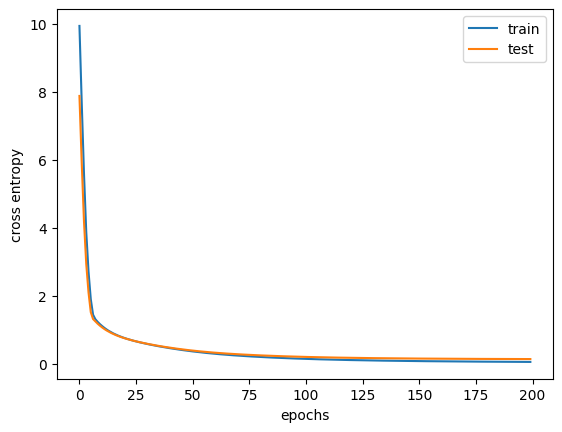

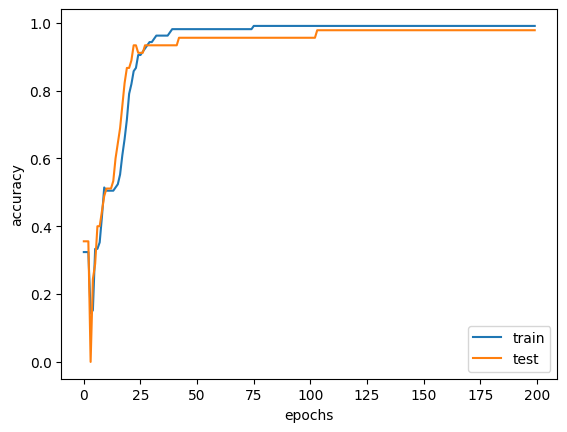

In [11]:
class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = Quadric(4, 3)
        self.act = nn.ReLU()
        self.output = nn.Linear(3, 3)

    def forward(self, x):
        x = self.hidden(x)
        x = self.act(x)
        x = self.output(x)
        return x

# loss metric and optimizer
model = Multiclass()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# prepare model and training parameters
n_epochs = 200
batch_size = 5
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# Restore best model
model.load_state_dict(best_weights)

# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# Summary

Let's define some things:

$i$ = number of inputs

Quadric neuron: $2i+1$ parameters, $3i$ multiplications, $2i+1$ additions

Linear neuron: $i+1$ parameters, $i$ multiplications, $i+1$ additions

$n$ = number of units in layer

$p$ = number of parameters (weights and bias)

$m$ = number of multiplications

$a$ = number of additions

Quadric layer: $p = n(2i+1)$, $m = n(3i)$, $a = n(2i+1)$

Linear layer: $p = n(i+1)$, $m = ni$, $a = n(i+1)$

Now let's compare the complexity of above models:

Linear model:
 - linear hidden layer with 4 inputs and 8 units: $p_h = 40$, $m_h = 32$, $a_h = 40$
 - linear output layer with 8 inputs and 3 units: $p_h = 27$, $m_h = 24$, $a_h =27$
 - total: $p = 67$, $m = 56$, $a = 67$

Quadric (hybrid) model:
- quadric hidden layer with 4 inputs and 3 units: $p_h = 27$, $m_h = 36$, $a_h = 27$
- linear output layer with 3 inputs and 3 units: $p_h = 12$, $m_h = 9$, $a_h = 12$
- total: $p = 39$, $m = 45$, $a = 39$

The results are by no means a scientific study but even in this small example we can see the following reductions:

- reduction in model size (parameters): ~42%
- reduction in multiplications: ~20%
- reduction in additions: ~42%

This is very encouraging for further studies in all kinds of applications like vision, transformers, GAN, LLMs etc. where we encounter many more layers and many more units per layer and will be able to significantly reduce model size by introducing quadric layers and hybrid models or even purely quadric models.

In my humble opinion deep quadric learning is a valuable contribution towards much smaller models of the same level of performance with all the advantages mentioned in Episode 1 like democratization of access to AI, reduction and therefore decentralization of compute power, smaller carbon foot print etc.

